<a href="https://colab.research.google.com/github/MarLen611/HR_data/blob/main/bigdata_%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%872.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подготовка данных
Загрузим файлы по оценкам (ratings) и фильмам (movies)

Создадим на их основе pandas-датафреймы

In [ ]:
# Загружаем необходимые библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

In [ ]:
# Загружаем данные из таблицы u.data.csv в переменную df_ratings
df_ratings = pd.read_csv('u.data.csv', sep='\t', names=['user id', 'item id', 'rating', 'timestamp'])

In [ ]:
df_ratings.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
# Загружаем данные из таблицы u.item.csv в переменную df_movies
df_movies = pd.read_csv('u.item.csv', sep='|', encoding='ISO-8859-1', names=['movie id','movie title','release date','video release date',
                                                                             'IMDb URL', 'unknown', 'Action','Adventure','Animation','Childrens',
                                                                             'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
                                                                             'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
df_movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Найдем id пользователя, который поставил больше всего оценок, и посмотрим на количество оценок этого пользователя.

In [ ]:
# Здесь используем метод value_counts() для подсчета количества оценок для каждого пользователя и сохраняем результат в переменную value_counts.
value_counts = df_ratings['user id'].value_counts()
# Затем находим максимальное количество оценок с помощью метода max()
max_count = value_counts.max()
# и получаем соответствующий id пользователя с помощью метода idxmax()
user_id = value_counts.idxmax()

print(f'Id пользователя, поставившего больше всего оценок:\n {user_id}\n')
print(f'Общее количество оценок {user_id} пользователя:\n {max_count}\n')

Id пользователя, поставившего больше всего оценок:
 405

Общее количество оценок 405 пользователя:
 737



In [ ]:
# В переменной ratings оставляем данные только по самому активному пользователю
ratings = df_ratings[df_ratings['user id'] == 405]
ratings.head(3)

,user id,item id,rating,timestamp
12276,405,56,4,885544911
12383,405,592,1,885548670
12430,405,1582,1,885548670


Добавим новые колонки, где каждая колонка - это жанр,
и значения заполнены по следующей логике:

если фильм принадлежит данному жанру, то значение колонки = 1,

если не имеет отношения к данному жанру, то значение колонки =  0

In [ ]:
# Переименовываем стоблец с идентификатором фильма, для дальнейшего объединения таблиц ratings и df_movies
# т.к. хранящиеся данные в колонках одинаковы по смыслу и логике
ratings = ratings.rename(columns={'item id':'movie id'})
ratings.head(3)

,user id,movie id,rating,timestamp
12276,405,56,4,885544911
12383,405,592,1,885548670
12430,405,1582,1,885548670


In [ ]:
# Объединяем таблицы по столбцу с индентификатором фильма
ratings_movies = ratings.merge(df_movies,left_on='movie id',right_on='movie id',how='inner')
ratings_movies.head(3)

,user id,movie id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,405,56,4,885544911,Pulp Fiction (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Pulp%20Fictio...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,405,592,1,885548670,True Crime (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?True%20Crime%...,0,0,...,0,0,0,0,1,0,0,1,0,0
2,405,1582,1,885548670,T-Men (1947),01-Jan-1947,NaN,http://us.imdb.com/M/title-exact?T-Men%20(1947),0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# В переменной df_ratings также переименуем стоблец с идентификатором фильма
df_r = df_ratings[['item id','rating']]
df_r = df_r.rename(columns={'item id':'movie id'})

Добавляем новые показатели:

    'rating_count' - общее количество оценок от всех пользователей на фильм;

    'rating_sum' - суммарная оценка от всех пользователей.

In [ ]:
# Добавляем колонку с общим количеством оценок от всех пользователей на фильм - 'rating_count'
# и колонку с суммарной оценкой от всех пользователей - 'rating_sum'
df = df_r.groupby(['movie id'])['rating'].agg([('count'),('sum')]).reset_index()
df = df.rename(columns={'count':'rating_count', 'sum':'rating_sum'})
df.head(3)

,movie id,rating_count,rating_sum
0,1,452,1753
1,2,131,420
2,3,90,273


In [ ]:
# Объединяем таблицы по столбцу с индентификатором фильма
df_rm = ratings_movies.merge(df, left_on='movie id',right_on='movie id',how='inner')
df_rm.head(3)

,user id,movie id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_count,rating_sum
0,405,56,4,885544911,Pulp Fiction (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Pulp%20Fictio...,0,0,...,0,0,0,0,0,0,0,0,394,1600
1,405,592,1,885548670,True Crime (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?True%20Crime%...,0,0,...,0,0,1,0,0,1,0,0,9,30
2,405,1582,1,885548670,T-Men (1947),01-Jan-1947,NaN,http://us.imdb.com/M/title-exact?T-Men%20(1947),0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
df_rm.columns

Index(['user id', 'movie id', 'rating', 'timestamp', 'movie title',
       'release date', 'video release date', 'IMDb URL', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'rating_count',
       'rating_sum'],
      dtype='object')

## Построение модели линейной регрессии

Модель для рекомендации фильмов пользователям

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

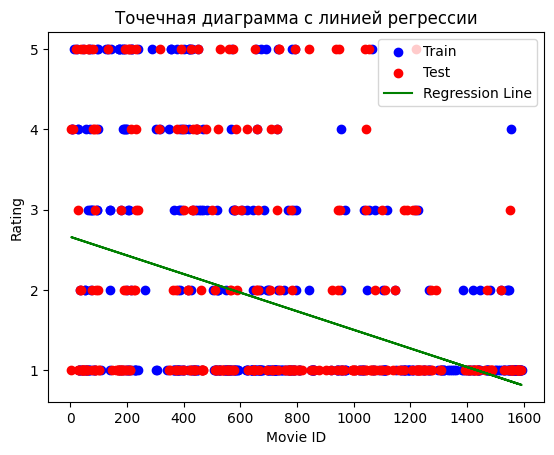

MSE on train set: 1.4567123203039758
MSE on test set: 1.7648830017815968


In [ ]:
# Разделение данных на признаки и целевую переменную
x = df_rm['movie id']
y = df_rm['rating']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Создание и обучение модели линейной регрессии
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Предсказания модели
y_pred_train = lr.predict(X_train.values.reshape(-1, 1))
y_pred_test = lr.predict(X_test.values.reshape(-1, 1))

# Построим точечную диаграмму для тренировочной выборки
plt.scatter(X_train, y_train, color='b', label='Train')
# Построим точечную диаграмму для тестовой выборки
plt.scatter(X_test, y_test, color='r', label='Test')
# Построим линию регрессии для тренировочной выборки
plt.plot(X_train, y_pred_train, color='g', label='Regression Line')

# Добавим заголовок и метки осей
plt.title('Точечная диаграмма с линией регрессии')
plt.xlabel('Movie ID')
plt.ylabel('Rating')
plt.legend()
plt.show()

# Вычислим значения MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("MSE on train set:", mse_train)
print("MSE on test set:", mse_test)

Среднеквадратичное отклонение между фактическими значениями рейтинга и предсказанными моделью значениями составляет на тестовой выборке примерно 1.74 и 1.51 на тренировочной выборке.

В целом, видим, что все линии регрессии имеют перекрытие точек между тренировочной и тестовой выборками. Это может указывать на наличие общих трендов и закономерностей в данных. И может указывать на сильную корреляцию между 'movie id' и 'rating', особенно, при значении 'rating' равном 1.

##Установка PySpark

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [633 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,036 kB]
Hit:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,572 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,282 kB]
Get:13 ht

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.2.2/spark-3.2.2-bin-hadoop2.7.tgz

In [ ]:
!tar -xvf spark-3.2.2-bin-hadoop2.7.tgz

tar: spark-3.2.2-bin-hadoop2.7.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.2-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

## Загружаем набор данных

In [ ]:
df = spark.read.csv('u.item.csv', inferSchema=True, sep="|")

In [ ]:
df.show(10)

+---+--------------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|                 _c1|        _c2| _c3|                 _c4|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|
+---+--------------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|  1|    Toy Story (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  0|  0|  1|  1|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
|  2|    GoldenEye (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  1|  1|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  3|   Four Rooms (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  0|  0|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  4|   Get Shorty (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  

Переименуем колонки

In [ ]:
df = df.withColumnRenamed('_c0','movie id')
df = df.withColumnRenamed('_c1', 'movie title')
df = df.withColumnRenamed('_c2', 'release date')
df = df.withColumnRenamed('_c3', 'video release date')
df = df.withColumnRenamed('_c4', 'IMDb URL')
df = df.withColumnRenamed('_c5', 'unknown')
df = df.withColumnRenamed('_c6', 'Action')
df = df.withColumnRenamed('_c7', 'Adventure')
df = df.withColumnRenamed('_c8', 'Animation')
df = df.withColumnRenamed('_c9', 'Childrens')
df = df.withColumnRenamed('_c10', 'Comedy')
df = df.withColumnRenamed('_c11', 'Crime')
df = df.withColumnRenamed('_c12', 'Documentary')
df = df.withColumnRenamed('_c13', 'Drama')
df = df.withColumnRenamed('_c14', 'Fantasy')
df = df.withColumnRenamed('_c15', 'Film-Noir')
df = df.withColumnRenamed('_c16', 'Horror')
df = df.withColumnRenamed('_c17', 'Musical')
df = df.withColumnRenamed('_c18', 'Mystery')
df = df.withColumnRenamed('_c19', 'Romance')
df = df.withColumnRenamed('_c20', 'Sci-Fi')
df = df.withColumnRenamed('_c21', 'Thriller')
df = df.withColumnRenamed('_c22', 'War')
df = df.withColumnRenamed('_c23', 'Western')

In [ ]:
df.show(10)

+--------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+---------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|movie id|         movie title|release date|video release date|            IMDb URL|unknown|Action|Adventure|Animation|Childrens|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+--------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+---------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|       1|    Toy Story (1995)| 01-Jan-1995|              null|http://us.imdb.co...|      0|     0|        0|        1|        1|     1|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|       0|  0|      0|
|       2|    GoldenEye (1995)| 01-Jan-1995|    

## Посмотрим общую статистику по нашему датафрейму
Для этого воспользуемся командой describe

In [ ]:
df.describe().show()

+-------+------------------+--------------------+------------+------------------+--------------------+--------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+
|summary|          movie id|         movie title|release date|video release date|            IMDb URL|             unknown|             Action|         Adventure|          Animation|          Childrens|             Comedy|              Crime|         Documentary|              Drama|             Fantasy|           Film-Noir|              Horror|            Musical|            Mystery|            Romance|             Sci-Fi|          Thriller|                War|            Western|
+-------+------------------+

In [ ]:
df.dtypes

[('movie id', 'int'),
 ('movie title', 'string'),
 ('release date', 'string'),
 ('video release date', 'string'),
 ('IMDb URL', 'string'),
 ('unknown', 'int'),
 ('Action', 'int'),
 ('Adventure', 'int'),
 ('Animation', 'int'),
 ('Childrens', 'int'),
 ('Comedy', 'int'),
 ('Crime', 'int'),
 ('Documentary', 'int'),
 ('Drama', 'int'),
 ('Fantasy', 'int'),
 ('Film-Noir', 'int'),
 ('Horror', 'int'),
 ('Musical', 'int'),
 ('Mystery', 'int'),
 ('Romance', 'int'),
 ('Sci-Fi', 'int'),
 ('Thriller', 'int'),
 ('War', 'int'),
 ('Western', 'int')]

Удалим малоинформативные колонки со строковыми значениями

In [ ]:
df_new = df.select(
 'movie id',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western')
df_new.take(1)

[Row(movie id=1, unknown=0, Action=0, Adventure=0, Animation=1, Childrens=1, Comedy=1, Crime=0, Documentary=0, Drama=0, Fantasy=0, Film-Noir=0, Horror=0, Musical=0, Mystery=0, Romance=0, Sci-Fi=0, Thriller=0, War=0, Western=0)]

In [ ]:
df_new.show(10)

+--------+-------+------+---------+---------+---------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|movie id|unknown|Action|Adventure|Animation|Childrens|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+--------+-------+------+---------+---------+---------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|       1|      0|     0|        0|        1|        1|     1|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|       0|  0|      0|
|       2|      0|     1|        1|        0|        0|     0|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|       1|  0|      0|
|       3|      0|     0|        0|        0|        0|     0|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|       1|  0|      0|
|       4|      

##Запишем второй файл 'u.data.csv' в датафрейм df_2 и подготовим к работе в pyspark

In [ ]:
df_2 = spark.read.csv('u.data.csv', inferSchema=True, sep="\t")

In [ ]:
df_2.show(10)

+---+---+---+---------+
|_c0|_c1|_c2|      _c3|
+---+---+---+---------+
|196|242|  3|881250949|
|186|302|  3|891717742|
| 22|377|  1|878887116|
|244| 51|  2|880606923|
|166|346|  1|886397596|
|298|474|  4|884182806|
|115|265|  2|881171488|
|253|465|  5|891628467|
|305|451|  3|886324817|
|  6| 86|  3|883603013|
+---+---+---+---------+
only showing top 10 rows



In [ ]:
df_2 = df_2.withColumnRenamed('_c0','user id')
df_2 = df_2.withColumnRenamed('_c1', 'movie id')
df_2 = df_2.withColumnRenamed('_c2', 'rating')
df_2 = df_2.withColumnRenamed('_c3', 'timestamp')

In [ ]:
df_2.show(10)

+-------+--------+------+---------+
|user id|movie id|rating|timestamp|
+-------+--------+------+---------+
|    196|     242|     3|881250949|
|    186|     302|     3|891717742|
|     22|     377|     1|878887116|
|    244|      51|     2|880606923|
|    166|     346|     1|886397596|
|    298|     474|     4|884182806|
|    115|     265|     2|881171488|
|    253|     465|     5|891628467|
|    305|     451|     3|886324817|
|      6|      86|     3|883603013|
+-------+--------+------+---------+
only showing top 10 rows



In [ ]:
df_2.describe().show()

+-------+------------------+------------------+------------------+-----------------+
|summary|           user id|          movie id|            rating|        timestamp|
+-------+------------------+------------------+------------------+-----------------+
|  count|            100000|            100000|            100000|           100000|
|   mean|         462.48475|         425.53013|           3.52986|8.8352885148862E8|
| stddev|266.61442012750905|330.79835632558473|1.1256735991443214|5343856.189502848|
|    min|                 1|                 1|                 1|        874724710|
|    max|               943|              1682|                 5|        893286638|
+-------+------------------+------------------+------------------+-----------------+



In [ ]:
df_2new = df_2.select('movie id', 'rating')
df_2new.take(1)

[Row(movie id=242, rating=3)]

In [ ]:
df_2new.show(10)

+--------+------+
|movie id|rating|
+--------+------+
|     242|     3|
|     302|     3|
|     377|     1|
|      51|     2|
|     346|     1|
|     474|     4|
|     265|     2|
|     465|     5|
|     451|     3|
|      86|     3|
+--------+------+
only showing top 10 rows



##Выведем среднюю оценку для каждого фильма

In [ ]:
from pyspark.sql.functions import lit

In [ ]:
grouped = df_2new.groupBy(['movie id'])
grouped.mean('rating').show(5)

+--------+------------------+
|movie id|       avg(rating)|
+--------+------------------+
|     496| 4.121212121212121|
|     471|3.6108597285067874|
|     463| 3.859154929577465|
|     148|          3.203125|
|    1342|               2.5|
+--------+------------------+
only showing top 5 rows



##Посчитаем среднюю оценку для каждого жанра

In [ ]:
# Объединим df_2new и df_new
df_rtg = df_new.join(df_2new, 'movie id')

In [ ]:
df_rtg.show(10)

+--------+-------+------+---------+---------+---------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+------+
|movie id|unknown|Action|Adventure|Animation|Childrens|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|rating|
+--------+-------+------+---------+---------+---------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+------+
|     242|      0|     0|        0|        0|        0|     1|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|       0|  0|      0|     3|
|     302|      0|     0|        0|        0|        0|     0|    1|          0|    0|      0|        1|     0|      0|      1|      0|     0|       1|  0|      0|     3|
|     377|      0|     0|        0|        0|        1|     1|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|   

In [ ]:
grouped_Action = df_rtg.groupBy(['Action'])
grouped_Action.mean('rating').show(1)

+------+-----------------+
|Action|      avg(rating)|
+------+-----------------+
|     1|3.480245417953027|
+------+-----------------+
only showing top 1 row



In [ ]:
grouped_Adventure = df_rtg.groupBy(['Adventure'])
grouped_Adventure.mean('rating').show(1)

+---------+-----------------+
|Adventure|      avg(rating)|
+---------+-----------------+
|        1|3.503526503308369|
+---------+-----------------+
only showing top 1 row



In [ ]:
grouped_Childrens = df_rtg.groupBy(['Childrens'])
grouped_Childrens.mean('rating').show(1)

+---------+------------------+
|Childrens|       avg(rating)|
+---------+------------------+
|        1|3.3532442216652742|
+---------+------------------+
only showing top 1 row



In [ ]:
grouped_Comedy = df_rtg.groupBy(['Comedy'])
grouped_Comedy.mean('rating').show(1)

+------+------------------+
|Comedy|       avg(rating)|
+------+------------------+
|     1|3.3940734781442745|
+------+------------------+
only showing top 1 row



In [ ]:
grouped_Crime = df_rtg.groupBy(['Crime'])
grouped_Crime.mean('rating').show(1)

+-----+------------------+
|Crime|       avg(rating)|
+-----+------------------+
|    1|3.6322780881440098|
+-----+------------------+
only showing top 1 row



In [ ]:
grouped_Documentary = df_rtg.groupBy(['Documentary'])
grouped_Documentary.mean('rating').show(1)

+-----------+------------------+
|Documentary|       avg(rating)|
+-----------+------------------+
|          1|3.6728232189973613|
+-----------+------------------+
only showing top 1 row



In [ ]:
grouped_Drama = df_rtg.groupBy(['Drama'])
grouped_Drama.mean('rating').show(1)

+-----+------------------+
|Drama|       avg(rating)|
+-----+------------------+
|    1|3.6873793708484772|
+-----+------------------+
only showing top 1 row



In [ ]:
grouped_Fantasy = df_rtg.groupBy(['Fantasy'])
grouped_Fantasy.mean('rating').show(1)

+-------+------------------+
|Fantasy|       avg(rating)|
+-------+------------------+
|      1|3.2152366863905324|
+-------+------------------+
only showing top 1 row



In [ ]:
grouped_FilmNoir = df_rtg.groupBy(['Film-Noir'])
grouped_FilmNoir.mean('rating').show(1)

+---------+------------------+
|Film-Noir|       avg(rating)|
+---------+------------------+
|        1|3.9215233698788228|
+---------+------------------+
only showing top 1 row



In [ ]:
grouped_Horror = df_rtg.groupBy(['Horror'])
grouped_Horror.mean('rating').show(1)

+------+------------------+
|Horror|       avg(rating)|
+------+------------------+
|     1|3.2903893172841827|
+------+------------------+
only showing top 1 row



In [ ]:
grouped_Musical = df_rtg.groupBy(['Musical'])
grouped_Musical.mean('rating').show(1)

+-------+-----------------+
|Musical|      avg(rating)|
+-------+-----------------+
|      1|3.521396851029471|
+-------+-----------------+
only showing top 1 row



In [ ]:
grouped_Mystery = df_rtg.groupBy(['Mystery'])
grouped_Mystery.mean('rating').show(1)

+-------+----------------+
|Mystery|     avg(rating)|
+-------+----------------+
|      1|3.63813155386082|
+-------+----------------+
only showing top 1 row



In [ ]:
grouped_Romance = df_rtg.groupBy(['Romance'])
grouped_Romance.mean('rating').show(1)

+-------+-----------------+
|Romance|      avg(rating)|
+-------+-----------------+
|      1|3.621704948358255|
+-------+-----------------+
only showing top 1 row



In [ ]:
grouped_SciFi = df_rtg.groupBy(['Sci-Fi'])
grouped_SciFi.mean('rating').show(1)

+------+------------------+
|Sci-Fi|       avg(rating)|
+------+------------------+
|     1|3.5607227022780834|
+------+------------------+
only showing top 1 row



In [ ]:
grouped_Thriller = df_rtg.groupBy(['Thriller'])
grouped_Thriller.mean('rating').show(1)

+--------+------------------+
|Thriller|       avg(rating)|
+--------+------------------+
|       1|3.5090069495245064|
+--------+------------------+
only showing top 1 row



In [ ]:
grouped_War = df_rtg.groupBy(['War'])
grouped_War.mean('rating').show(1)

+---+-----------------+
|War|      avg(rating)|
+---+-----------------+
|  1|3.815811874866993|
+---+-----------------+
only showing top 1 row



In [ ]:
grouped_Western = df_rtg.groupBy(['Western'])
grouped_Western.mean('rating').show(1)

+-------+------------------+
|Western|       avg(rating)|
+-------+------------------+
|      1|3.6132686084142396|
+-------+------------------+
only showing top 1 row



In [ ]:
grouped_unknown = df_rtg.groupBy(['unknown'])
grouped_unknown.mean('rating').show(1)

+-------+-----------+
|unknown|avg(rating)|
+-------+-----------+
|      1|        3.2|
+-------+-----------+
only showing top 1 row



##В спарке получим 2 датафрейма с 5-ю самыми популярными и самыми непопулярными фильмами

In [ ]:
filtered_max = df_rtg.filter('rating == 5')
filtered_max.select('movie id','rating').show(5)

+--------+------+
|movie id|rating|
+--------+------+
|     465|     5|
|    1014|     5|
|     222|     5|
|     387|     5|
|      95|     5|
+--------+------+
only showing top 5 rows



In [ ]:
filtered_max = df_rtg.filter('rating == 1')
filtered_max.select('movie id','rating').show(5)

+--------+------+
|movie id|rating|
+--------+------+
|     377|     1|
|     346|     1|
|    1081|     1|
|     796|     1|
|     288|     1|
+--------+------+
only showing top 5 rows



In [ ]:
df_count=grouped.count().show(5)

+--------+-----+
|movie id|count|
+--------+-----+
|     496|  231|
|     471|  221|
|     463|   71|
|     148|  128|
|    1342|    2|
+--------+-----+
only showing top 5 rows

